In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


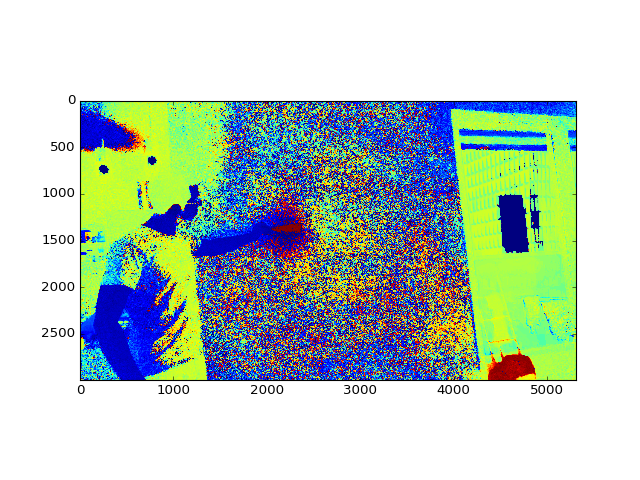

In [18]:
imbgr = cv2.imread('../images/20180405_132057_HDR.jpg')

imhsv = cv2.cvtColor(imbgr, cv2.COLOR_BGR2HSV)

ROI = imhsv #[2400:2800,1420:1520]


plt.figure()
plt.imshow(ROI[:,:,0]);

# plt.figure()
#plt.hist2d(list(ROI[:,:,0].flat),list(ROI[:,:,1].flat),bins=40)


In [14]:
def get_plain_mask(ROI):
    maskH1 = ROI[:,:,0]>170
    maskH2 = ROI[:,:,0]<10
    maskH = np.bitwise_or(maskH1,maskH2)
    maskS = ROI[:,:,1]>80

    mask = np.bitwise_and(maskH,maskS)
    return mask


<IPython.core.display.Javascript object>


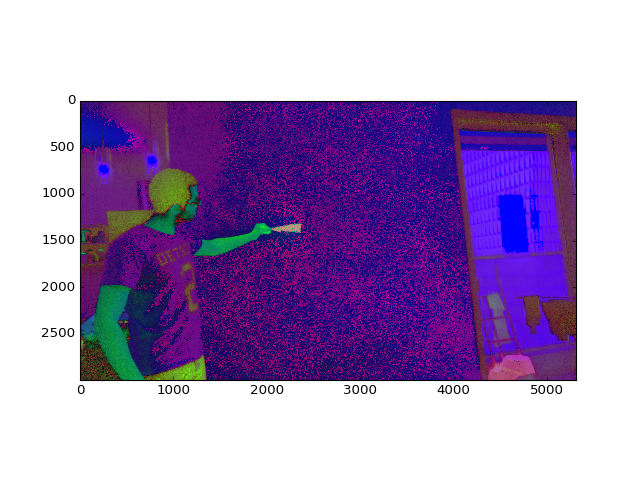

<IPython.core.display.Javascript object>


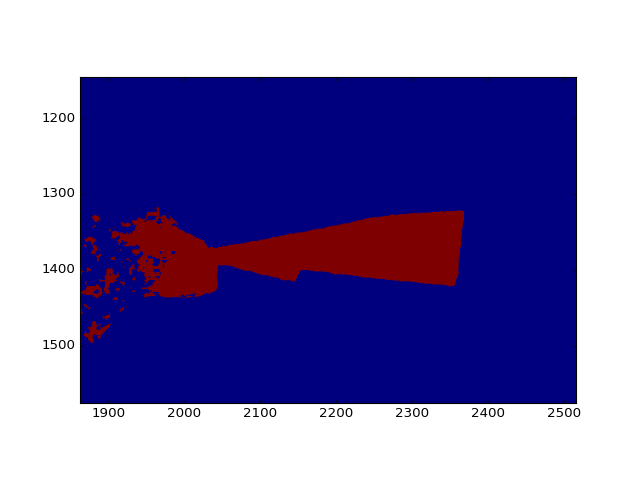

In [19]:
plain = slice(1400, 1550), slice(2500, 2800)
plt.figure()
plt.imshow(imhsv)
mask = get_plain_mask(imhsv)
plt.figure()
plt.imshow(mask)

<IPython.core.display.Javascript object>


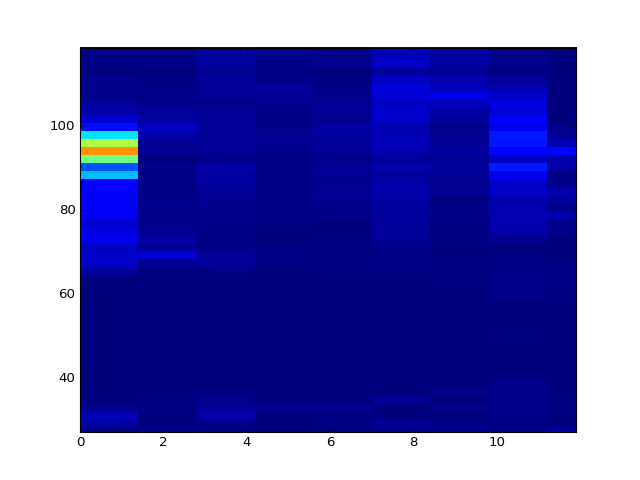

(array([[0., 0., 0., ..., 0., 0., 7.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 3.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  0.       ,   1.3984375,   2.796875 ,   4.1953125,   5.59375  ,
          6.9921875,   8.390625 ,   9.7890625,  11.1875   ,  12.5859375,
         13.984375 ,  15.3828125,  16.78125  ,  18.1796875,  19.578125 ,
         20.9765625,  22.375    ,  23.7734375,  25.171875 ,  26.5703125,
         27.96875  ,  29.3671875,  30.765625 ,  32.1640625,  33.5625   ,
         34.9609375,  36.359375 ,  37.7578125,  39.15625  ,  40.5546875,
         41.953125 ,  43.3515625,  44.75     ,  46.1484375,  47.546875 ,
         48.9453125,  50.34375  ,  51.7421875,  53.140625 ,  54.5390625,
         55.9375   ,  57.3359375,  58.734375 ,  60.1328125,  61.53125  ,
         62.9296875,  64.328125 ,  65.7265625,  67.125    ,  68.5234375,
         69.921875 , 

In [13]:
plt.figure()
plt.hist2d(list(imhsv[plain[0], plain[1], 0].flat), list(imhsv[plain[0], plain[1], 1].flat), 128)

In [62]:
np.bincount(mask.flat)[1] / (mask.shape[0] * mask.shape[1])

0.0016788413694940403

<IPython.core.display.Javascript object>


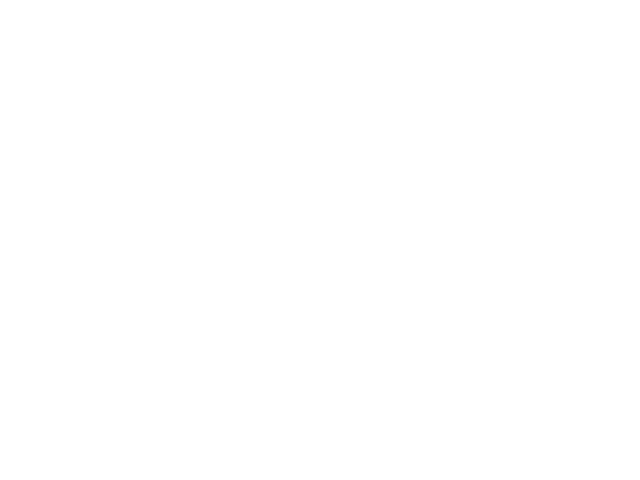

In [40]:
umask = np.uint8(mask) * 255
plt.figure()
plt.imshow(umask)

<IPython.core.display.Javascript object>


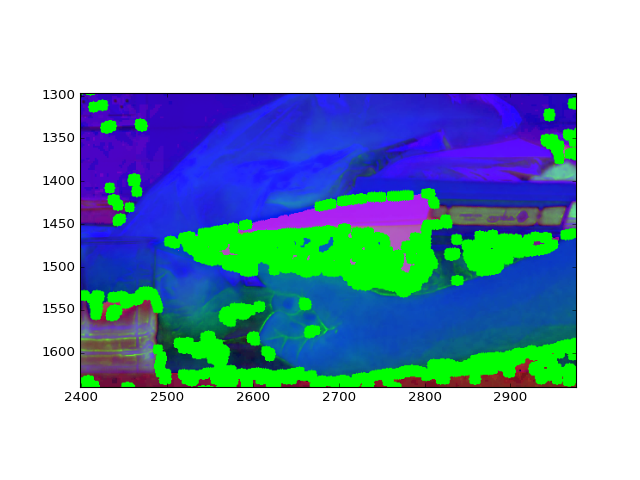

In [28]:
_, contours, _ = cv2.findContours(imhsv[:,:,0].copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
res_im = cv2.drawContours(imhsv[0, contours, -1, (0,255,0), 10)

plt.figure()
plt.imshow(res_im)


4023.5
2298.5


<IPython.core.display.Javascript object>


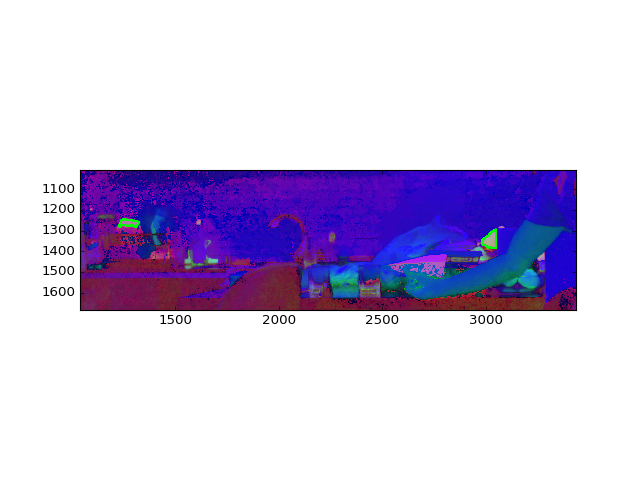

In [41]:
_, contours, _ = cv2.findContours(umask.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

'''
print(len(contours))
for i, c in enumerate(contours):
    m = cv2.moments(c)
    if m['m00'] == 0:
        print(str(i) + ' is 0')
        continue
    cX = int(m['m10'] / m['m00'])
    cY = int(m['m01'] / m['m00'])
    print(cv2.contourArea(c), cX, cY)
'''


filtered_contours = sorted([c for c in contours if cv2.contourArea(c) > 1000], key=lambda c: cv2.contourArea(c), reverse=True)
for c in filtered_contours:
    print(cv2.contourArea(c))
res_im = cv2.drawContours(imhsv, filtered_contours, -1, (0,255,0), 10)

plt.figure()
plt.imshow(res_im)

In [ ]:
vis = imhsv.copy()
cv2.polylines(vis, regions, 1, (255,0,0), thickness=10)

1
98.5
88.5
72.0
826.0
484.0
410.5
214.0
134.5


<IPython.core.display.Javascript object>


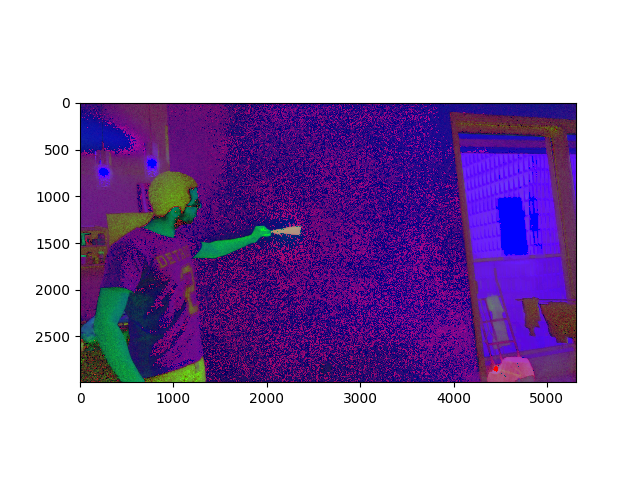

In [48]:
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
big_hulls = [p for p in hulls if cv2.contourArea(p) > 500]
print(len(big_hulls))
for p in hulls:
    print(cv2.contourArea(p))
vis = imhsv.copy()
cv2.polylines(vis, big_hulls, 1, (255, 0, 0), thickness=20)
plt.figure()
plt.imshow(vis)

In [63]:
def center_of_mass(bool_im):
    return np.average(bool_im.nonzero(), axis=1)